In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

env = gym.make("Taxi-v3")
env.reset()
env.render()

DependencyNotInstalled: pygame is not installed, run `pip install gym[toy_text]`

In [79]:
def eval_policy_better(env_, pi_, gamma_, t_max_, episodes_):
    env_.reset()

    v_pi_rep = np.empty(episodes_)
    for e in range(episodes_):
        s_t = env.reset()
        v_pi = 0
        for t in range(t_max_):
            a_t = pi_[s_t]
            s_t, r_t, done, info = env_.step(a_t) 
            v_pi += gamma_**t*r_t
            if done:
                break
        v_pi_rep[e] = v_pi
        env.close()
    return np.mean(v_pi_rep), np.min(v_pi_rep), np.max(v_pi_rep), np.std(v_pi_rep)

In [90]:
num_states = env.observation_space.n
num_actions = env.action_space.n

qtable = np.zeros((num_states,num_actions)) 
episodes = 1000
interactions = 100
epsilon = 0.99
alpha = 0.5
gamma = 0.9 
debug = 0
hist = [] 

# Main Q-learning loop
for episode in range(episodes):

    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for interact in range(interactions):
        # exploitation vs. exploratin by e-greedy sampling of actions
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state,:])
        else:
            action = np.random.randint(0,num_actions)

        # Observe
        new_state, reward, done, info = env.step(action)

        # Update Q-table
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # Check if terminated
        if done == True: 
            break
    
    if episode % 10 == 0 or episode == 1:
        pi = np.argmax(qtable, axis=1)
        val_mean, val_min, val_max, val_std = eval_policy_better(env, pi, gamma, interactions, 1000)
        hist.append([episode, val_mean,val_min,val_max,val_std])
        '''
        if debug == True:
            print(pi)
            print(val_mean)
        '''

env.reset()

93

(101, 5)


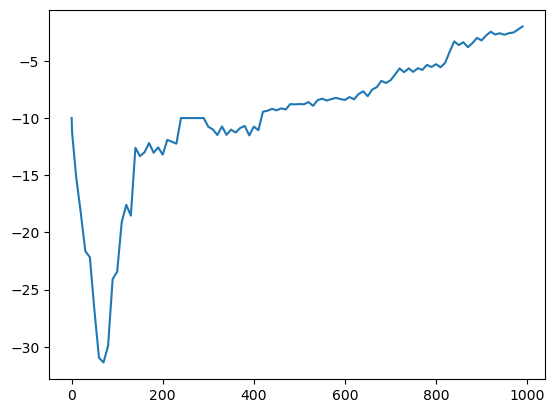

In [91]:
hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
plt.show()

(101, 5)


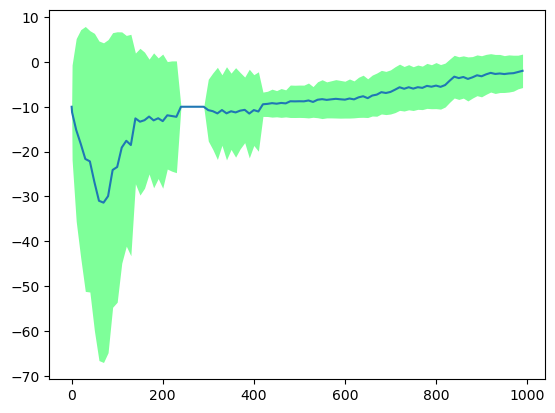

In [92]:
hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
plt.fill_between(hist[:,0], hist[:,1]-hist[:,4],hist[:,1]+hist[:,4],
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)
plt.show()

In [93]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Input(shape=(1, num_states))
    tf.keras.layers.dense(64, activation="relu")
    tf.keras.layers.dense(num_actions, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics="accuracy")
model.summary
'''

# Deep Q-learning loop
for episode in range(episodes):

    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for interact in range(interactions):
        # exploitation vs. exploratin by e-greedy sampling of actions
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state,:])
        else:
            action = np.random.randint(0,num_actions)

        # Observe
        new_state, reward, done, info = env.step(action)

        # Update Q-table
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # Check if terminated
        if done == True: 
            break
    
    if episode % 10 == 0 or episode == 1:
        pi = np.argmax(qtable, axis=1)
        val_mean, val_min, val_max, val_std = eval_policy_better(env, pi, gamma, interactions, 1000)
        hist.append([episode, val_mean,val_min,val_max,val_std])

env.reset()
'''

SyntaxError: invalid syntax (1692264072.py, line 3)